Loading data...
NEI data loaded with shape: (2005169, 33)
Found 2628 power plant facilities
County boundaries loaded with 3233 counties

Top facilities by NOx emissions:
       Facility ID                                      Facility Name State  \
16307      5363811                     NEW MADRID POWER PLANT MARSTON    MO   
23393      7239111                ST. CLAIR / BELLE RIVER POWER PLANT    MI   
21378      6688411  THOMAS HILL ENERGY CENTER POWER DIVISION THOMA...    MO   
15280      5050511                     PacifiCorp- Hunter Power Plant    UT   
24749      7558311  Intermountain Power Service Corporation- Inter...    UT   
12032      4207311                     MARTIN LAKE ELECTRICAL STATION    TX   
25318      7738711          Miami Fort Power Company LLC (1431350093)    OH   
27339      8183111            ALCOA Warrick Power Plant AGC Div of Al    IN   
22241      6958711                                      PREPA Aguirre    PR   
26752      8087911  Minnkota Power Coope

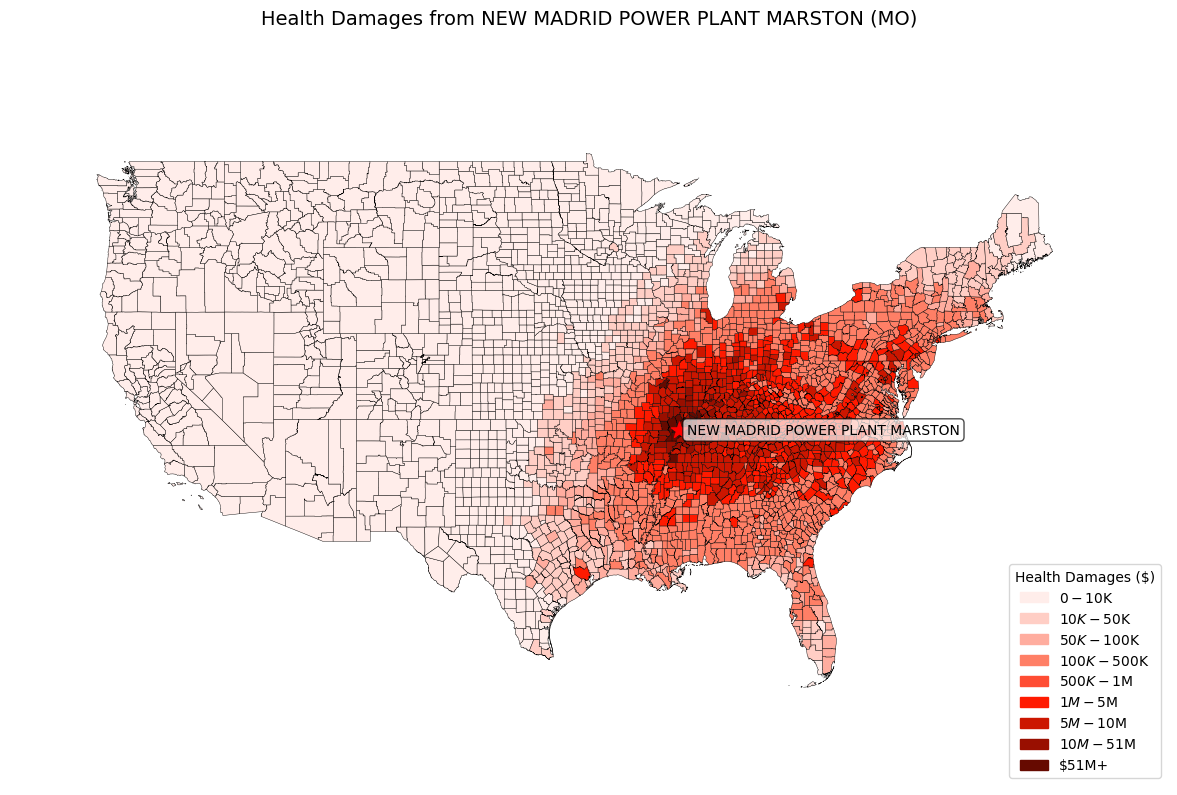


Most impacted county: New Madrid, Missouri
Health damages: $56.74 million

Total health damages by state ($ millions):
        State  HealthDamages_Millions
40  Tennessee              325.943025
15   Kentucky              324.974576
23   Missouri              252.779497
11   Illinois              168.827143
12    Indiana               96.142245


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Import the functions from the main script
from single_plant_analysis import load_data, list_facilities, analyze_plant_by_id

# Set file paths - update these to match your data locations
nei_file_path = "../data/raw/2021_NEI_Facility_summary.csv"
counties_shapefile_path = "../data/raw/cb_2018_us_county_500k/cb_2018_us_county_500k.shp"

# Example 1: Load data and list top facilities 
egu_gdf, us_counties = load_data(nei_file_path, counties_shapefile_path)

if egu_gdf is not None:
    # List top emitting facilities
    print("\nTop facilities by NOx emissions:")
    sample_facilities = list_facilities(egu_gdf, n=10)
    print(sample_facilities)
    
    # Example 2: Analyze a specific facility by ID
    # Replace this with the ID of the plant you want to analyze
    facility_id = sample_facilities['Facility ID'].iloc[0]
    
    print(f"\nAnalyzing facility ID: {facility_id}")
    results, county_impacts, national_totals = analyze_plant_by_id(
        nei_file_path, counties_shapefile_path, facility_id)
    
    # Example 3: Custom analysis for specific counties
    if county_impacts is not None:
        # Find the most impacted county
        most_impacted = county_impacts.sort_values('HealthDamages', ascending=False).iloc[0]
        print(f"\nMost impacted county: {most_impacted['County']}")
        print(f"Health damages: ${most_impacted['HealthDamages']/1e6:.2f} million")
        
        # Calculate total damages by state
        state_damages = county_impacts.groupby('State')['HealthDamages'].sum().reset_index()
        state_damages['HealthDamages_Millions'] = state_damages['HealthDamages'] / 1e6
        state_damages = state_damages.sort_values('HealthDamages_Millions', ascending=False)
        
        print("\nTotal health damages by state ($ millions):")
        print(state_damages[['State', 'HealthDamages_Millions']].head(5))
else:
    print("Could not load data. Please check file paths.")